In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LOADING TRAIN DATA

In [2]:
data = pd.read_csv('train.tsv',sep='\t')

In [3]:
data.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


DATA VISUALIZATION

In [5]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

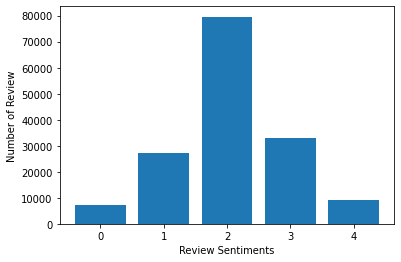

In [6]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [7]:
print(data.iloc[0]['Phrase'],'Sentiment - ',data.iloc[0]['Sentiment'])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . Sentiment -  1


In [8]:
print(data.iloc[1]['Phrase'],'Sentiment - ',data.iloc[1]['Sentiment'])

A series of escapades demonstrating the adage that what is good for the goose Sentiment -  2


In [9]:
print(data.iloc[32]['Phrase'],'Sentiment - ',data.iloc[32]['Sentiment'])
print('\n')
print(data.iloc[33]['Phrase'],'Sentiment - ',data.iloc[33]['Sentiment'])

for the gander , some of which occasionally amuses but none of which amounts to much of a story Sentiment -  2


the gander , some of which occasionally amuses but none of which amounts to much of a story Sentiment -  1


In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

def own_analyser(phrase):
    phrase = phrase.split()
    for i in range(0,len(phrase)):
        k = phrase.pop(0)
        if k not in string.punctuation:
                phrase.append(lm.lemmatize(k).lower())    
    return phrase

In [12]:
data.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [13]:
X = data['Phrase']
y = data['Sentiment']

MODEL TRAINING

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
phrase_train,phrase_test,sentiment_train,sentiment_test = train_test_split(X,y,test_size=0.3)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([('BOW',CountVectorizer(analyzer=own_analyser)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(phrase_train, sentiment_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(phrase_test)

confusion_matrix(predictions, sentiment_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[  444,   270,    74,     7,     0],
       [  978,  2778,  1219,   245,    44],
       [  632,  4791, 21125,  4721,   451],
       [   55,   328,  1431,  4439,  1508],
       [    5,    25,    66,   445,   737]])

PREDICTIONS

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, sentiment_test))
print("Precision : ", precision_score(predictions, sentiment_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, sentiment_test, average = 'weighted'))

Accuracy :  0.6305907984108676
Precision :  0.722165409176741
Recall :  0.6305907984108676


In [18]:
import nltk
nltk.download('wordnet')

pipeline.fit(phrase_train,sentiment_train)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Pipeline(memory=None,
         steps=[('BOW',
                 CountVectorizer(analyzer=<function own_analyser at 0x7f81a55aed08>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [19]:
predictions = pipeline.predict(phrase_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(sentiment_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.03      0.06      2114
           1       0.51      0.24      0.33      8192
           2       0.60      0.90      0.72     23915
           3       0.53      0.37      0.44      9857
           4       0.59      0.04      0.08      2740

    accuracy                           0.58     46818
   macro avg       0.56      0.32      0.33     46818
weighted avg       0.57      0.58      0.53     46818



LOADING TEST DATA

In [22]:
test_data = pd.read_csv('test.tsv',sep='\t')

In [23]:
test_data.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [25]:
test_predictions = pipeline.predict(test_data['Phrase'])

In [26]:
phrase_id = test_data['PhraseId'].values

In [27]:
test_predictions.shape

(66292,)

In [28]:
final_answer = pd.DataFrame({'PhraseId':phrase_id,'Sentiment':test_predictions})

In [29]:
final_answer.head(5)

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3




TESTING ON NEW REVIEWS

In [31]:
ex=[input(("enter a string: "))]
re2=model.predict(ex)
if(re2==0):
  print("negative")
elif (re2==1):
  print("somewhat negative")
elif (re2==2):
  print("neutral") 
elif (re2==3):
  print("somewhat positive")
else:
  print("positive")

enter a string: movie is very good
positive
